This project explores the Netflix titles dataset.  
I clean the data, analyze missing values, extract insights about countries, ratings, release years, and visualize key patterns.

The goal is to understand **Netflix’s global content trends** using Python, Pandas, and Seaborn.

In [23]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots appear in the notebook
%matplotlib inline



In [24]:
df = pd.read_csv("data/netflix_titles.csv")

Initial Exploration

In [25]:
print(df.head())
df.info()
df.shape
print(df.describe())
df.describe(include=['object'])

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s8807,Movie,Zubaan,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


Missing Values

In [26]:

# Check for missing values
df.isnull().sum()
df1=df.dropna(subset=['country'])
df1.head()
director_miss=df[pd.isnull(df.director)]
print(director_miss)
check_director_null=pd.isnull(df.director)
print(check_director_null)
number_null=check_director_null.sum()
print('the number of NaN director values is:',number_null)

     show_id     type                                title director  \
1         s2  TV Show                        Blood & Water      NaN   
3         s4  TV Show                Jailbirds New Orleans      NaN   
4         s5  TV Show                         Kota Factory      NaN   
10       s11  TV Show  Vendetta: Truth, Lies and The Mafia      NaN   
14       s15  TV Show      Crime Stories: India Detectives      NaN   
...      ...      ...                                  ...      ...   
8795   s8796  TV Show                      Yu-Gi-Oh! Arc-V      NaN   
8796   s8797  TV Show                           Yunus Emre      NaN   
8797   s8798  TV Show                            Zak Storm      NaN   
8800   s8801  TV Show                   Zindagi Gulzar Hai      NaN   
8803   s8804  TV Show                          Zombie Dumb      NaN   

                                                   cast  \
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   
3                            

Data Cleaning

In [27]:
# Convert values to string, remove spaces
rep=df.country.fillna('unkown')
df['country']=rep
df['date_added'] = df['date_added'].astype(str).str.strip()

# Convert to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Drop invalid dates
df = df.dropna(subset=['date_added'])

# Extract year and month
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

Analysis

In [28]:
l1=df.type=='Movie'
print('movies=',l1.sum())
print('tv_shows=',(df.type=='TV Show').sum())
if(((df.type=='Movie').sum())>((df.type=='TV Show').sum())):
    print("Netflix's top genre is Movies")
elif(((df.type=='Movie').sum())<((df.type=='TV Show').sum())):
    print("Netflix's top genre is TV Shows")
else:
    print('Netflix produce equally TV Shows and Movies')

movies= 6131
tv_shows= 2666
Netflix's top genre is Movies


In [29]:
df3=df.country.value_counts()
print('the most ferquent country:',df3.idxmax())
df4=df.rating.value_counts()
print('the most frequent age_rating is:',df4.idxmax()) 
df5=df.release_year.value_counts()
print('the year with the biggest number of productions is:',df5.idxmax())
df6=df.duration.value_counts()
print('the most frequent duration is:',df6.idxmax()) 
df7=df.month_added.value_counts()
print('the month that Netflix was the most active is:',df7.idxmax()) 


the most ferquent country: United States
the most frequent age_rating is: TV-MA
the year with the biggest number of productions is: 2018
the most frequent duration is: 1 Season
the month that Netflix was the most active is: 7


Visualizations

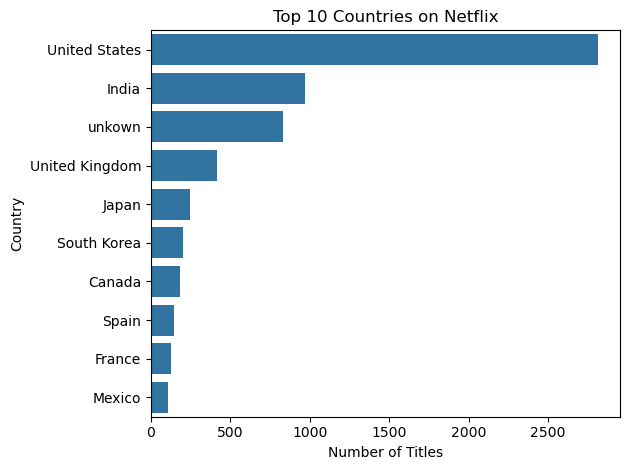

In [30]:
# Bar plot
# Top 10 countries with most productions
sns.countplot(y='country', data=df, order=df['country'].value_counts().head(10).index)
plt.title('Top 10 Countries on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.tight_layout() 
plt.show()

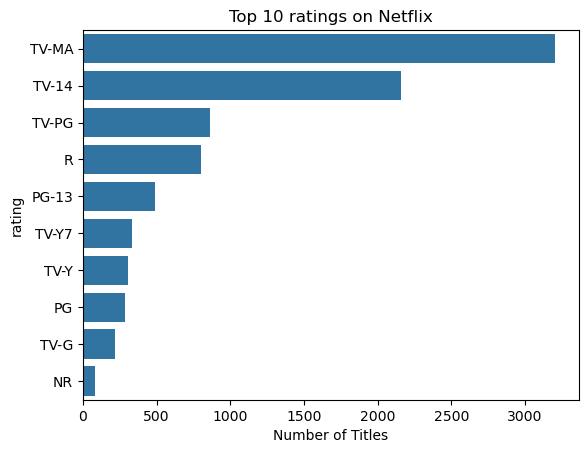

In [31]:
top_ratings = df['rating'].value_counts().head(10)
# Bar plot
# Top 10 ratings with most productions
sns.barplot(x=top_ratings.values, y=top_ratings.index)
plt.xlabel('Number of Titles')
plt.ylabel('rating')
plt.title('Top 10 ratings on Netflix')
plt.show()

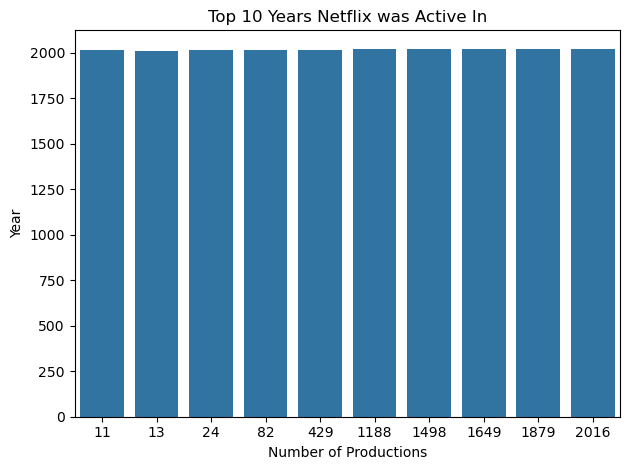

In [32]:
# Bar plot
# Top 10 years with most productions
df7 = df['year_added'].value_counts().head(10)
sns.barplot(x=df7.values, y=df7.index)
plt.xlabel('Number of Productions')
plt.ylabel('Year')
plt.title('Top 10 Years Netflix was Active In')
plt.tight_layout()
plt.show()


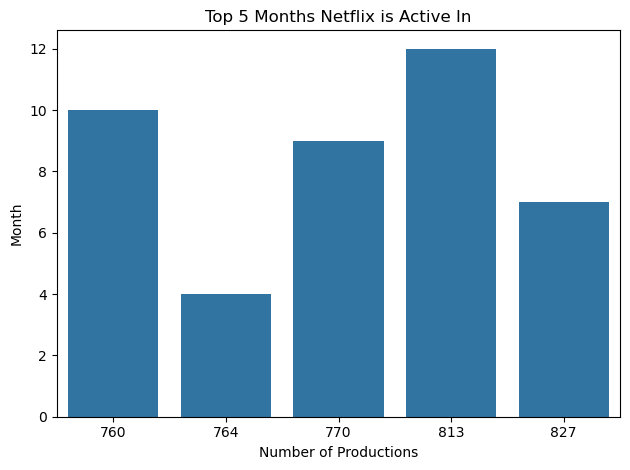

In [33]:
# Top 5 months with most productions
df8 = df['month_added'].value_counts().head(5)
sns.barplot(x=df8.values, y=df8.index)
plt.xlabel('Number of Productions')
plt.ylabel('Month')
plt.title('Top 5 Months Netflix is Active In')
plt.tight_layout()
plt.show()

In this analysis, we discovered:

- Netflix produces more **Movies** than TV Shows.
- The most frequent **age rating** is TV-MA.
- The **United States** produces the most Netflix content.
- Netflix activity increased significantly between **2015–2020**.
- Most content was added during the months of **July and October**.